In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import torch

import linop

In [2]:
foo = np.array([1,2,3,4,5])
foo[np.where(foo // 2 == 1)]

array([2, 3])

In [2]:
x = torch.randn((3, 3))
print(x)

tensor([[-0.2489,  0.4854,  0.1258],
        [-0.3511,  1.3512, -1.1185],
        [ 0.4819,  1.2337,  1.0993]])


In [5]:
x = (x - torch.mean(x, dim=1, keepdim=True))/ (torch.std(x, dim=1, keepdim=True) + 1e-5)
print(x)

tensor([[ 0.0770, -1.0363,  0.9592],
        [-0.3749,  1.1333, -0.7584],
        [ 0.8202, -1.1139,  0.2938]])


In [3]:
x = torch.randn(1,100)

size = 19

conv = torch.nn.Conv1d(1,1,size,padding=size//2,padding_mode='circular')
conv.weight.data = torch.randn(1,1,size)/torch.sqrt(torch.tensor(size))

print(torch.norm(x))
print(torch.norm(conv(x)))
print(conv(x).shape)

tensor(10.0468)
tensor(12.2565, grad_fn=<LinalgVectorNormBackward0>)
torch.Size([1, 100])


In [11]:
x = torch.randn(100,dtype=torch.float64)
print(x.norm())
x = x.repeat(3,1)

conv = linop.RandomConvolution(shape=(100,), kernel_size=19)

y = conv.apply(x)
print(y[0].norm())
print(y[0,0:10])
print(y[1,0:10])
print(y[2,0:10])

tensor(9.5434, dtype=torch.float64)
tensor(11.2470, dtype=torch.float64, grad_fn=<LinalgVectorNormBackward0>)
tensor([ 0.1567,  0.3389,  0.3556, -0.0651,  0.7106,  0.2515, -0.1805, -0.0232,
        -0.3713, -0.0750], dtype=torch.float64, grad_fn=<SliceBackward0>)
tensor([ 0.1567,  0.3389,  0.3556, -0.0651,  0.7106,  0.2515, -0.1805, -0.0232,
        -0.3713, -0.0750], dtype=torch.float64, grad_fn=<SliceBackward0>)
tensor([ 0.1567,  0.3389,  0.3556, -0.0651,  0.7106,  0.2515, -0.1805, -0.0232,
        -0.3713, -0.0750], dtype=torch.float64, grad_fn=<SliceBackward0>)


In [18]:
model = linop.StructuredRandom(shape=(100, 100), n_layers=2)

In [ ]:
np.append(np.empty(0), np.array([1,2,3,4]))

[1 2 3 4]


0.9999981130396218


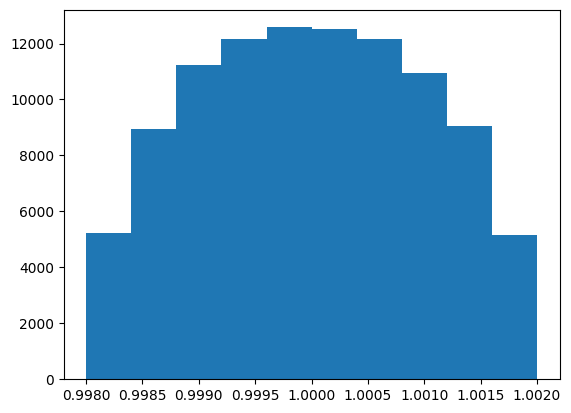

In [40]:
marchenko = linop.MarchenkoPastur(alpha=1000000.0)
samples = marchenko.sample(100000, normalized=True)
print(samples.var() + samples.mean()**2)
plt.hist(samples)
plt.show()

In [5]:
model = linop.Rademacher((10,10),dtype=torch.float32,device='cpu')
model.values

tensor([[ 1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.],
        [-1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.],
        [-1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.],
        [ 1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.],
        [-1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.],
        [ 1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.],
        [ 1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.],
        [ 1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.],
        [-1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.],
        [ 1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.]])

In [16]:
x = torch.randn((3,100, 100))
y = model.apply(x)

In [10]:
import os
print(os.getcwd())

/home/zhhu/workspaces/reservoir-frontier


In [11]:
save = 'bar'
foo = np.array([[1,2,3],[4,5,6]])
if not os.path.exists("data/" + f'{save}'):
    os.makedirs("data/" + f'{save}')
np.save("data/" + f'{save}' + "/" + "foo.npy", foo)

In [6]:
now = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
print(now)

20250306132302


In [17]:
y.shape

torch.Size([3, 100, 100])

In [1]:
a = None
print(f'this is {a}')

this is None


In [10]:
import torch
import torch.nn.functional as F

# Example tensor
x = torch.randn(1000, 100)

# Normalize along the second dimension (dim=1)
x_normalized = F.normalize(x, p=2, dim=1)
print(x_normalized[8].norm())

tensor(1.)


In [7]:
import os
import re

data_dir = "./data/"  # Replace with the path to your data folder

# Regex to match a leading datetime (14 digits) followed by an underscore
pattern = re.compile(r'^(\d{14})_(.+)$')

for name in os.listdir(data_dir):
    match = pattern.match(name)
    if match:
        new_name = match.group(2)
        old_path = os.path.join(data_dir, name)
        new_path = os.path.join(data_dir, new_name)
        os.rename(old_path, new_path)
        print(f"Renamed: {name} → {new_name}")

Renamed: 20250413201920_rand_sensi_10layer_x1_seed1_res[0, 4]_input[0, 4] → rand_sensi_10layer_x1_seed1_res[0, 4]_input[0, 4]
Renamed: 20250413201838_rand_sensi_100layer_x1_seed1_res[0, 4]_input[0, 4] → rand_sensi_100layer_x1_seed1_res[0, 4]_input[0, 4]
Renamed: 20250413201850_rand_sensi_1000layer_x1_seed1_res[0, 4]_input[0, 4] → rand_sensi_1000layer_x1_seed1_res[0, 4]_input[0, 4]
Renamed: 20250413201908_rand_sensi_10000layer_x1_seed1_res[0, 4]_input[0, 4] → rand_sensi_10000layer_x1_seed1_res[0, 4]_input[0, 4]


In [ ]:
import os

target_dir = "./data"  # Replace with your folder path

for item in os.listdir(target_dir):
    item_path = os.path.join(target_dir, item)
    if os.path.isfile(item_path):
        os.remove(item_path)
        print(f"Deleted file: {item_path}")

In [3]:
import os
import re

path = "./data"  # Replace with your folder path

for folder in os.listdir(path):
    if not os.path.isdir(os.path.join(path, folder)):
        continue

    new_name = folder
    new_name = re.sub(r'res(\[.*?\])', r'weight\1', new_name)
    new_name = re.sub(r'input(\[.*?\])', r'bias\1', new_name)

    old_path = os.path.join(path, folder)
    new_path = os.path.join(path, new_name)

    if new_name != folder:
        os.rename(old_path, new_path)
        print(f"Renamed: {folder} → {new_name}")

Renamed: randomx1_res2_start100_seed1_res[0, 4]_input[0, 4] → randomx1_res2_start100_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_res5_start100_seed1_res[0, 4]_input[0, 4] → randomx1_res5_start100_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_50layer_seed1_res[0, 4]_input[0, 4] → randomx1_50layer_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_50layer_normed_seed1_res[0, 4]_input[0, 4] → randomx1_50layer_normed_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_25layer_seed1_res[0, 4]_input[0, 4] → randomx1_25layer_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_15layer_seed1_res[0, 4]_input[0, 4] → randomx1_15layer_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_15layer_normed_seed1_res[0, 4]_input[0, 4] → randomx1_15layer_normed_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_10layer_seed1_res[0, 4]_input[0, 4] → randomx1_10layer_seed1_weight[0, 4]_bias[0, 4]
Renamed: randomx1_sensi1e-20_seed1_res[0, 4]_input[0, 4] → randomx1_sensi1e-20_seed1_weight[0, 4]_bias[0, 4]
Renamed: random

In [2]:
model = linop.StructuredRandom(shape=(100,), n_layers=2, mags=['marchenko','unit'])

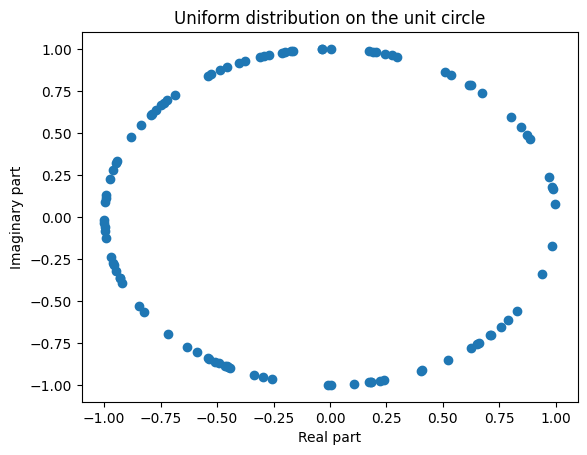

In [13]:
diag = model.diagonals[1].values
# diag contains elements on the unit circle
# plot the elements to confirm this
plt.scatter(diag.real, diag.imag)
plt.title('Uniform distribution on the unit circle')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.show()

In [20]:
x = torch.randn((100,))
print('norm of x:', x.norm())
y = model.apply(x)
print('norm of y:', y.norm())
print('norm of y real:', y.real.norm())
print('norm of y imag:', y.imag.norm())

norm of x: tensor(10.1499)
norm of y: tensor(10.3085, dtype=torch.float64)
norm of y real: tensor(6.8378, dtype=torch.float64)
norm of y imag: tensor(7.7142, dtype=torch.float64)
